## Machine Learning Project 2022/2023 - Group 60

Group members:<p>
    Beatriz Carmo - 20220685 <p>
    João Malho - 20220696 <p>
    Lizaveta Baryionak - 20220667 <p>
    Marta Antunes - 20221094 <p>
    Tomás Silva - 20221639

In [1]:
%autosave 90

#basic libraries: numpy and pandasfor data handling, pyplot 
#and seaborn for visualization, math for mathematical operations
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from scipy.stats import chi2_contingency
from sklearn.metrics import classification_report

#dataset partition
from sklearn.model_selection import train_test_split

#feature selection methods
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#scaling methods and categorical variable encoder
from sklearn.preprocessing import RobustScaler, OneHotEncoder

#model selection 
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

#undersampling methods
#from imblearn.under_sampling import CondensedNearestNeighbour

import warnings
warnings.filterwarnings('ignore')

#ensemble classifier models
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression


#addicional 
from datetime import datetime
from datetime import date

#enconding
from sklearn.preprocessing import LabelEncoder

Autosaving every 90 seconds


### Loading Data (and joining it into one DataFrame)

In [2]:
# Training data

train_demo = pd.read_excel('train_demo.xlsx')
train_habits = pd.read_excel('train_habits.xlsx')
train_health = pd.read_excel('train_health.xlsx')

# Testing data

test_demo = pd.read_excel('test_demo.xlsx')
test_habits = pd.read_excel('test_habits.xlsx')
test_health = pd.read_excel('test_health.xlsx')


In [3]:
# Join all the trainning data in 1 dataframe 

train_demo.set_index('PatientID')
train_habits.set_index('PatientID')
train_health.set_index('PatientID')

train_full = pd.merge(pd.merge(train_demo, train_habits, on = 'PatientID'), train_health, on='PatientID')
train_full.set_index('PatientID', inplace=True)
train_data = train_full.copy()

In [4]:
# Join all the testing data in 1 dataframe

test_demo.set_index('PatientID')
test_habits.set_index('PatientID')
test_health.set_index('PatientID')

test_full = pd.merge(pd.merge(test_demo, test_habits, on='PatientID'), test_health, on='PatientID')
test_full.set_index('PatientID', inplace=True)
test_data = test_full.copy()

In [5]:
# Checking how the training dataframe is

train_full.head()

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,No,I consider myself a social drinker,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,No,I consider myself a social drinker,No,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...


In [6]:
# Checking how the testing dataframe is

test_full.head()

,Name,Birth_Year,Region,Education,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,
1343,Mr. Ricardo Sherman,1970,East Midlands,Elementary School (1st to 9th grade),Yes,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Between one liter and two liters,172,80,203,172,20,2,Not sure,I have/had pregnancy diabetes or borderline di...
1727,Mr. Jessie Strickland,1966,Yorkshire and the Humber,University Complete (3 or more years),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,171,80,225,130,21,0,Not sure,I do have diabetes
1828,Mr. Robert Foreman,1978,West Midlands,High School Incomplete (10th to 11th grade),No,I usually consume alcohol every day,Yes,Less than 1. I do not consume fruits every day.,Between one liter and two liters,171,78,237,130,24,1,More than 3 years,I have/had pregnancy diabetes or borderline di...
1155,Mr. Edwin Ferguson,1968,Yorkshire and the Humber,High School Incomplete (10th to 11th grade),No,I usually consume alcohol every day,No,Less than 1. I do not consume fruits every day.,Less than half a liter,174,87,313,108,19,0,Not sure,I do have diabetes
1020,Mr. Eliseo Krefft,1962,East Midlands,High School Incomplete (10th to 11th grade),No,I consider myself a social drinker,No,Less than 1. I do not consume fruits every day.,Less than half a liter,172,56,189,140,19,14,More than 3 years,I have/had pregnancy diabetes or borderline di...


### Initial Data Exploration

**Information about the Data fields of our DataFrame**

PatientID - The unique identifier of the patient <p>
Birth Year - Patient Year of Birth <p>
Name - Name of the patient <p>
Region - Patient Living Region <p>
Education - Answer to the question: What is the highest grade or year of school you have? <p>
Disease - The dependent variable. If the patient has the disease (Disease = 1) or not (Disease = 0) <p>
Height - Patient’s height <p>
Weight - Patient’s weight <p>
Checkup - Answer to the question: How long has it been since you last visited a doctor for a routine Checkup? (A routine<p>
Checkup is a general physical exam, not an exam for a specific injury, illness, or condition.) <p>
Diabetes - Answer to the question: (Ever told) you or your direct relatives have diabetes? <p>
HighCholesterol - Cholesterol value <p>
BloodP ressure - Blood Pressure in rest value <p>
Mental Health - Answer to the question: During the past 30 days, for about how many days did poor physical or mental health keep you from doing your usual activities, such as self-care, work, or recreation?<p>
Physical Health - Answer to the question: Thinking about your physical health, which includes physical illness and injury,for how many days during the past 30 days was your physical health not good to the point where it was difficult to walk?<p>
Smoking Habit - Answer to the question: Do you smoke more than 10 cigars daily? <p>
Drinking Habit - Answer to the question: What is your behavior concerning alcohol consumption? <p>
Exercise - Answer to the question: Do you exercise (more than 30 minutes) 3 times per week or more? <p>
Fruit Habit - Answer to the question: How many portions of fruits do you consume per day? <p>
Water Habit - Answer to the question: How much water do you drink per day?

In [7]:
# Checking the strings are aligned

train_data['Region'].unique()

# This do not occur in test data but for a check just run the below code:
# test_data['Region'].unique()

array(['London', 'South West', 'Yorkshire and the Humber', 'South East',
       'East Midlands', 'West Midlands', 'East of England', 'North West',
       'North East', 'LONDON'], dtype=object)

In [8]:
# change the LONDON to London in Training df

train_data['Region'] = train_data['Region'].replace(['LONDON'], 'London')

In [9]:
#delete duplicates
#put everything equel (lower casa)
#see f1 score /fscore
#see exercise, disease, smoking
#birth year --> age
#making intervals for ages

In [10]:
# By info we can check if exist any null in dataframe
    # We can conclude that exists null elements in Education
    
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         787 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

In [11]:
# We have to fill the null values with 'Unknow' to avoid empty data
train_data['Education'].fillna('Unknown', inplace = True)

# After replacing nulls by 'Unknow' we can check below that we dont have more null in dataframe
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1167 to 1117
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              800 non-null    object
 1   Birth_Year        800 non-null    int64 
 2   Region            800 non-null    object
 3   Education         800 non-null    object
 4   Disease           800 non-null    int64 
 5   Smoking_Habit     800 non-null    object
 6   Drinking_Habit    800 non-null    object
 7   Exercise          800 non-null    object
 8   Fruit_Habit       800 non-null    object
 9   Water_Habit       800 non-null    object
 10  Height            800 non-null    int64 
 11  Weight            800 non-null    int64 
 12  High_Cholesterol  800 non-null    int64 
 13  Blood_Pressure    800 non-null    int64 
 14  Mental_Health     800 non-null    int64 
 15  Physical_Health   800 non-null    int64 
 16  Checkup           800 non-null    object
 17  Diabetes    

In [12]:
# lets do the same approach to test_data to check if our test have clean information
    # We can conlude that test_data dont have any null elements 
test_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 1343 to 1757
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              225 non-null    object
 1   Birth_Year        225 non-null    int64 
 2   Region            225 non-null    object
 3   Education         225 non-null    object
 4   Smoking_Habit     225 non-null    object
 5   Drinking_Habit    225 non-null    object
 6   Exercise          225 non-null    object
 7   Fruit_Habit       225 non-null    object
 8   Water_Habit       225 non-null    object
 9   Height            225 non-null    int64 
 10  Weight            225 non-null    int64 
 11  High_Cholesterol  225 non-null    int64 
 12  Blood_Pressure    225 non-null    int64 
 13  Mental_Health     225 non-null    int64 
 14  Physical_Health   225 non-null    int64 
 15  Checkup           225 non-null    object
 16  Diabetes          225 non-null    object
dtypes: int64(7),

### We have to change the non numeric categoricalcolumns in numeric ones by Interger Enconding or One-Hot Encoding

#### 1) Direct Binary

In [13]:
# Several columns are binary strings as 'Yes' and 'No' which can easily be replaced to 0 and 1 
    # train_data['Smoking_Habit'].unique()
    # train_data['Exercise'].unique()

train_data['Exercise'] = train_data['Exercise'].map({'Yes': 1, 'No': 0})
train_data['Smoking_Habit'] = train_data['Smoking_Habit'].map({'Yes': 1, 'No': 0})

train_data

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,London,High School Incomplete (10th to 11th grade),1,0,I usually consume alcohol every day,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,155,67,358,120,21,2,More than 3 years,Neither I nor my immediate family have diabetes.
1805,Mr. Sherman Nero,1969,South West,High School Incomplete (10th to 11th grade),1,0,I consider myself a social drinker,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,173,88,230,142,9,0,Not sure,Neither I nor my immediate family have diabetes.
1557,Mr. Mark Boller,1974,Yorkshire and the Humber,Elementary School (1st to 9th grade),1,0,I consider myself a social drinker,0,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,162,68,226,122,26,0,More than 3 years,Neither I nor my immediate family have diabetes.
1658,Mr. David Caffee,1958,London,University Complete (3 or more years),0,0,I usually consume alcohol every day,1,Less than 1. I do not consume fruits every day.,More than half a liter but less than one liter,180,66,313,125,13,8,Not sure,I have/had pregnancy diabetes or borderline di...
1544,Mr. Gerald Emery,1968,South East,University Incomplete (1 to 2 years),1,0,I consider myself a social drinker,0,1 to 2 pieces of fruit in average,More than half a liter but less than one liter,180,58,277,125,18,2,More than 3 years,I have/had pregnancy diabetes or borderline di...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,Mr. Philip Klink,1972,East Midlands,High School Incomplete (10th to 11th grade),0,0,I consider myself a social drinker,1,Less than 1. I do not consume fruits every day.,Between one liter and two liters,178,61,204,144,12,4,Not sure,Neither I nor my immediate family have diabetes.
1386,Mrs. Jackie Valencia,1980,North West,Elementary School (1st to 9th grade),1,0,I usually consume alcohol every day,0,Less than 1. I do not consume fruits every day.,Between one liter and two liters,157,61,213,120,23,0,More than 3 years,I have/had pregnancy diabetes or borderline di...
1088,Mrs. Cheryl Harris,1860,East Midlands,Elementary School (1st to 9th grade),0,0,I consider myself a social drinker,0,3 to 4 pieces of fruit in average,More than half a liter but less than one liter,167,48,272,140,20,17,More than 3 years,Neither I nor my immediate family have diabetes.


#### 2) By Label Enconding

In [14]:
# categorical = train_data[['Region','Education','Drinking_Habit','Fruit_Habit','Water_Habit','Checkup','Diabetes']]
lab = LabelEncoder()
train_data[['Region','Education','Drinking_Habit','Fruit_Habit','Water_Habit','Checkup','Diabetes']] = train_data[['Region','Education','Drinking_Habit','Fruit_Habit','Water_Habit','Checkup','Diabetes']].apply(lab.fit_transform)
train_data

,Name,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,,
1167,Mrs. Stephanie Gay,1965,2,2,1,0,2,1,3,0,155,67,358,120,21,2,2,3
1805,Mr. Sherman Nero,1969,6,2,1,0,0,1,3,0,173,88,230,142,9,0,3,3
1557,Mr. Mark Boller,1974,8,0,1,0,0,0,3,2,162,68,226,122,26,0,2,3
1658,Mr. David Caffee,1958,2,4,0,0,2,1,3,2,180,66,313,125,13,8,3,2
1544,Mr. Gerald Emery,1968,5,5,1,0,0,0,0,2,180,58,277,125,18,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,Mr. Philip Klink,1972,0,2,0,0,0,1,3,0,178,61,204,144,12,4,3,3
1386,Mrs. Jackie Valencia,1980,4,0,1,0,2,0,3,0,157,61,213,120,23,0,2,2
1088,Mrs. Cheryl Harris,1860,0,0,0,0,0,0,1,2,167,48,272,140,20,17,2,3


#### 3) Also Name is not necessary once we already have the PatientID which will lead us to Name in system 

In [15]:
train_data = train_data.drop(['Name'], axis=1)
train_data

,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
PatientID,,,,,,,,,,,,,,,,,
1167,1965,2,2,1,0,2,1,3,0,155,67,358,120,21,2,2,3
1805,1969,6,2,1,0,0,1,3,0,173,88,230,142,9,0,3,3
1557,1974,8,0,1,0,0,0,3,2,162,68,226,122,26,0,2,3
1658,1958,2,4,0,0,2,1,3,2,180,66,313,125,13,8,3,2
1544,1968,5,5,1,0,0,0,0,2,180,58,277,125,18,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,1972,0,2,0,0,0,1,3,0,178,61,204,144,12,4,3,3
1386,1980,4,0,1,0,2,0,3,0,157,61,213,120,23,0,2,2
1088,1860,0,0,0,0,0,0,1,2,167,48,272,140,20,17,2,3


### Now we have to check the correlation between each element

In [16]:
# By spearman correlation we can check correlation between each element

correlation_spearman = train_data.corr('spearman').style.background_gradient(cmap="Blues")
correlation_spearman

,Birth_Year,Region,Education,Disease,Smoking_Habit,Drinking_Habit,Exercise,Fruit_Habit,Water_Habit,Height,Weight,High_Cholesterol,Blood_Pressure,Mental_Health,Physical_Health,Checkup,Diabetes
Birth_Year,1.000000,-0.066875,0.015612,0.228399,-0.104343,0.149438,-0.048916,0.371780,0.001031,0.066652,0.176250,-0.207905,-0.261038,0.374150,-0.231305,-0.068647,-0.169484
Region,-0.066875,1.000000,-0.002346,0.031087,0.030880,0.008448,-0.027615,-0.024116,-0.027765,-0.040227,-0.015401,-0.023902,0.047091,-0.046748,-0.041696,-0.045588,0.065975
Education,0.015612,-0.002346,1.000000,-0.003733,-0.094058,0.040693,-0.037957,-0.038472,-0.091446,-0.025920,0.015013,-0.016953,-0.042672,-0.001012,-0.019137,0.050782,0.015832
Disease,0.228399,0.031087,-0.003733,1.000000,-0.063278,0.202199,-0.423532,0.449997,-0.012824,-0.152341,0.189622,-0.107731,-0.135463,0.424439,-0.435109,-0.361265,-0.469230
Smoking_Habit,-0.104343,0.030880,-0.094058,-0.063278,1.000000,-0.084769,0.066124,-0.103693,-0.018685,0.032843,-0.014557,0.030787,0.159804,-0.008326,0.046214,-0.002330,0.009556
Drinking_Habit,0.149438,0.008448,0.040693,0.202199,-0.084769,1.000000,-0.116758,0.157554,-0.039437,-0.051968,0.088121,-0.191384,-0.143191,0.134310,-0.120693,-0.008954,-0.133604
Exercise,-0.048916,-0.027615,-0.037957,-0.423532,0.066124,-0.116758,1.000000,-0.188613,0.030925,0.048845,-0.191932,0.055694,0.063285,-0.362050,0.307574,0.220525,0.444468
Fruit_Habit,0.371780,-0.024116,-0.038472,0.449997,-0.103693,0.157554,-0.188613,1.000000,0.008648,-0.055891,0.048648,-0.118836,-0.039313,0.272742,-0.182858,-0.149428,-0.233559
Water_Habit,0.001031,-0.027765,-0.091446,-0.012824,-0.018685,-0.039437,0.030925,0.008648,1.000000,-0.018263,-0.019206,0.020297,0.020918,-0.040407,0.072968,-0.009433,-0.006303
Height,0.066652,-0.040227,-0.025920,-0.152341,0.032843,-0.051968,0.048845,-0.055891,-0.018263,1.000000,0.482946,-0.049529,-0.013789,-0.045699,0.053507,0.182128,0.048740


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

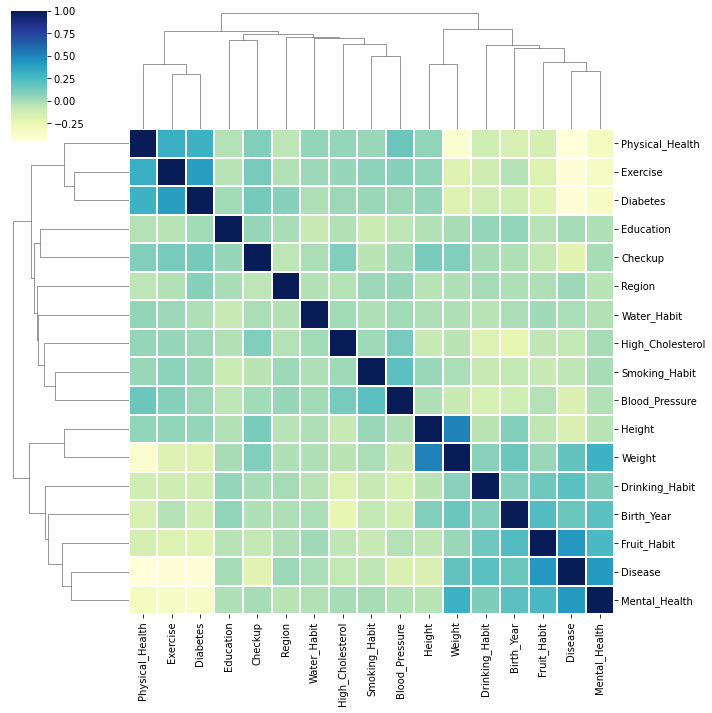

In [17]:
corrmat = train_data.corr()
  
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

### Lets test several metrics to obtain the best model possible for our model

#### 1) Logistic Regression

In [18]:
# Define the independent variables as x and the dependent variable "Disease" as y

x = train_data.drop(['Disease'], axis = 1)
y = train_data['Disease']

In [19]:
x_train, x_val, y_train, y_val = train_test_split(x,
                                                  y,
                                                  test_size = 0.25,
                                                  random_state = 15,
                                                  shuffle = True,
                                                  stratify = y)

In [20]:
print('train:{}% | validation:{}% | test:{}%'.format(round(len(y_train)/len(y),2),
                                                     round(len(y_val)/len(y),2),
                                                     round(len(y_val)/len(y),2)
                                                    ))

train:0.75% | validation:0.25% | test:0.25%


In [21]:
log_model = LogisticRegression().fit(x_train, y_train)

In [22]:
y_pred = log_model.predict(x_val)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0], dtype=int64)

In [23]:
cf_matrix = confusion_matrix(y_val, y_pred)
cf_matrix

array([[82, 15],
       [17, 86]], dtype=int64)

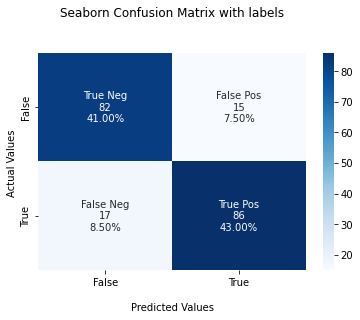

In [24]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [25]:
# Accuracy Score
accuracy_score(y_val, y_pred)

0.84

In [26]:
# Precision Score
precision_score(y_val, y_pred)

0.8514851485148515

In [27]:
# Recall Score
recall_score(y_val, y_pred)

0.8349514563106796

In [28]:
# Get the F1 Score
f1_score(y_val, y_pred)

0.8431372549019608

### Classification of metric 

In [29]:
def metrics(y_train, pred_train , y_val, pred_val):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))


    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))

In [30]:
labels_train = log_model.predict(x_train)
labels_val = log_model.predict(x_val)

In [31]:
metrics(y_train = y_train, pred_train = labels_train, y_val = y_val, pred_val = labels_val)

___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       292
           1       0.81      0.85      0.83       308

    accuracy                           0.82       600
   macro avg       0.82      0.82      0.82       600
weighted avg       0.82      0.82      0.82       600

[[231  61]
 [ 46 262]]
___________________________________________________________________________________________________________
                                                VALIDATION                                                 
-----------------------------------------------------------------------------------------------------------
  